# Exercise 3
### Analyze the results:

*CYCLUS* creates a .sqlite file as its output.  SQL is a database file type that consists of a series of tables.  A few functions have been included in cyutils.analysis.py to pull information from the sqlite database and create figures.<br><br>
An sqlite database can be opened and its contents viewed, but these database browsers often aren't helpful. Importing the data into an external function and manipulating it would provide more useful information. However, it can still be helpful to open and view the tables.
<img src="img/Selection_002.png" width="650"><br><br>
This a view of the tables within the database (using DB browser for SQLite).  However, to view the data within these tables, switch to the Browse Data tab:<br>
<img src="img/Selection_003.png" width="650"><br>
And select the table of interest.  Some tables have data that may need to be manipulated or used alongside other data in other tables, which is why using a python script is often ideal.

In [3]:
from pyne import nucname
import write as write
import analysis as analysis
import matplotlib.pyplot as plt
import numpy as np
from numpy import isclose
import matplotlib.pyplot as plt

Usage: python write_input.py [csv][init_date] [duration] [output_file_name]


First, a cursor that points to the sqlite file is created:

In [4]:
cur = analysis.cursor('cyclus.sqlite')

#### Total mass traded

How much $^{235}$U left the 1178MWe BRAIDWOOD-1?
To find out, lets use the `total_isotope_traded` function!
The `total_isotope_traded` takes three input arguments:
- cur (cursor to *CYCLUS* output file)
- facility (facility of interest)
- flux (direction of isotope transaction)
- nucid (nuclide id)

<div class="alert alert-info">
**Interactive Input**
<br/>
Using the table below, create the following variables.  Include appropriate comments.
</div>

| Variable | Value  | Purpose |
| -------- | ------ | ------- |
| `cur`      | `cur` | cursor to *CYCLUS* output file |
| `facility`      | `'1178MWe BRAIDWOOD-1'` | facility of interest |
| `flux`      | `'out'` | isotope transaction direction |
| `nucid`      | `922350000` | nuclide id |


In [5]:
cur = cur # cursor to CYCLUS output file
facility = '1178MWe BRAIDWOOD-1' # facility of interest
flux = 'out' # isotope transaction direction
nucid = 922350000 # nuclide id 
print('Total amount of U235 that left the '+ str(facility) +' reactor:')  
analysis.total_isotope_traded(cur,facility,flux,nucid)

Total amount of U235 that left the 1178MWe BRAIDWOOD-1 reactor:


13431.0

Now let's plot the cumulative mass of the spent nuclear fuel that is taken out of the 1178MWe BRAIDWOOD-1.
Again, let's use the handy `analysis.plot_out_flux_cumulative`function which takes input arguments:
- cur (cursor to *CYCLUS* output file)
- facility (facility of interest)
- title (title of plot)

<div class="alert alert-info">
**Interactive Input**
<br/>
Using the table below, create the following variables.  Include appropriate comments.
</div>

| Variable | Value  | Purpose |
| -------- | ------ | ------- |
| `cur`      | `cur` | cursor to *CYCLUS* output file |
| `facility`      | `'1178MWe BRAIDWOOD-1'` | facility of interest |
| `title`      | `'Cumulative Isotope Outflux of 1178MWe BRAIDWOOD-1'` | title of plot |


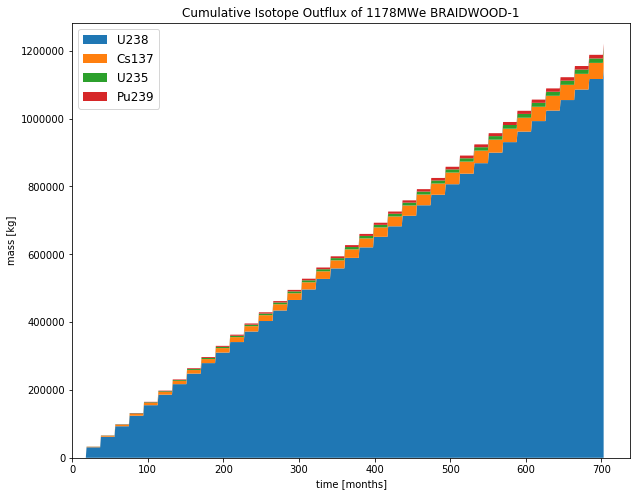

In [6]:
plt.rcParams['figure.figsize'] = [10, 8]
plt.rcParams['legend.fontsize'] = 12
facility = '1178MWe BRAIDWOOD-1'
title = 'Cumulative Isotope Outflux of 1178MWe BRAIDWOOD-1'
analysis.plot_out_flux_cumulative(cur, facility,title)

In cyclus, facilities are defined by their `agent_id`. For example if the simulation has a fleet of reactors, we can find out what the `agent_id` of the reactors in the simulation are
<div class="alert alert-info">
**Interactive Input**
<br/>
In the cell below use type `archetype = 'Reactor'` and then run the cell.
</div>

In [13]:
archetype = 'Reactor'
print('The agent_id for' + ' ' + archetype + ' ' +'' + 'is:')
analysis.agent_ids(cur,archetype='Reactor')


The agent_id for Reactor is:


['21']

In cyclus, facilities are defined by their `prototype_id`. For example if the simualtion had 20 different reactors, we could still find a certain one via its `prototype_id`.

<div class="alert alert-info">
**Interactive Input**
<br/>
In the cell below use type, find the prototype_id of the `'1178MWe BRAIDWOOD-1'` reactor by making variable called: `facility` and making it equal to `'1178MWe BRAIDWOOD-1'` and then run the cell.
</div>

In [14]:
facility = '1178MWe BRAIDWOOD-1'
print('The prototype_ids for' + ' ' + facility + ' ' +'' + 'are:')
analysis.prototype_id(cur, facility)

The prototype_ids for 1178MWe BRAIDWOOD-1 are:


['21']

Let's find out what the `prototype_id` for the `'UraniumMine'` in our simulation is.

In [15]:
facility = 'UraniumMine'
print('The prototype_ids for' + ' ' + facility + ' ' +'' + 'are:')
analysis.prototype_id(cur, facility)

The prototype_ids for UraniumMine are:


['23']

We can use these agent_ids and prototype_ids to find out more information on these facilities. For example, let's say we wanted to find out how much `'fresh-uox'` goes through the `'1178MWe BRAIDWOOD-1'` reactor? We can use the `facility_commodity_flux` function to find out. 

<div class="alert alert-info">
**Interactive Input**
<br/>
Using the table below, create the following variables.  Include appropriate comments.
</div>

| Variable | Value  | Purpose |
| -------- | ------ | ------- |
| `cur`      | `cur` | cursor to *CYCLUS* output file |
| `agentids`      | `[21]` | `agent_id` of reactor |
| `facility_commodities`      | `['fresh-uox']` | commodity of interest |
| `is_cum`      | True | cumulative of commodity amount |
| `is_outflux`      | False | Influx of commodity into reactor |


In [18]:
analysis.facility_commodity_flux(cur,agentids=[21],facility_commodities=['fresh-uox'],is_cum=True,is_outflux=False)

OrderedDict([('fresh-uox',
              [0.0,
               99.0,
               99.0,
               99.0,
               99.0,
               99.0,
               99.0,
               99.0,
               99.0,
               99.0,
               99.0,
               99.0,
               99.0,
               99.0,
               99.0,
               99.0,
               99.0,
               99.0,
               99.0,
               132.0,
               132.0,
               132.0,
               132.0,
               132.0,
               132.0,
               132.0,
               132.0,
               132.0,
               132.0,
               132.0,
               132.0,
               132.0,
               132.0,
               132.0,
               132.0,
               132.0,
               132.0,
               132.0,
               165.0,
               165.0,
               165.0,
               165.0,
               165.0,
               165.0,
               165.0,
   

As seen above, the `facility_commodity_flux` function returns a dictionary of the cumulative amount of `fresh-uox` fuel that enters the reactor over time. We can make this dictionary non-cumulative by setting `is_cum = False` as seen below. 

In [20]:
analysis.facility_commodity_flux(cur,agentids=[21],facility_commodities=['fresh-uox'],is_cum=False,is_outflux=False)

OrderedDict([('fresh-uox',
              [0.0,
               99.0,
               0.0,
               0.0,
               0.0,
               0.0,
               0.0,
               0.0,
               0.0,
               0.0,
               0.0,
               0.0,
               0.0,
               0.0,
               0.0,
               0.0,
               0.0,
               0.0,
               0.0,
               33.0,
               0.0,
               0.0,
               0.0,
               0.0,
               0.0,
               0.0,
               0.0,
               0.0,
               0.0,
               0.0,
               0.0,
               0.0,
               0.0,
               0.0,
               0.0,
               0.0,
               0.0,
               0.0,
               33.0,
               0.0,
               0.0,
               0.0,
               0.0,
               0.0,
               0.0,
               0.0,
               0.0,
               0.0,
          

As expected, the only time that `fresh-uox` enters the reactor is at times where the reactor is being refueled.

Now, let's plot the storage of the sink over time to see what commodities are stored in the sink.

Let's take a look at the total mass of spent nuclear fuel stored at the Nuclear Waste Repository.
To plot, use the `analysis.plot_in_flux_cumulative(cur, facility, title)` function. 
<div class="alert alert-info">
**Interactive Input**
<br/>
Using the table below, create the following variables.  Include appropriate comments.
</div>

| Variable | Value  | Purpose |
| -------- | ------ | ------- |
| `facility`      | `'NuclearRepository'` | facility of interest |
| `title`     | `'Cumulative Isotope Inventory of Repository'` | title of plot |


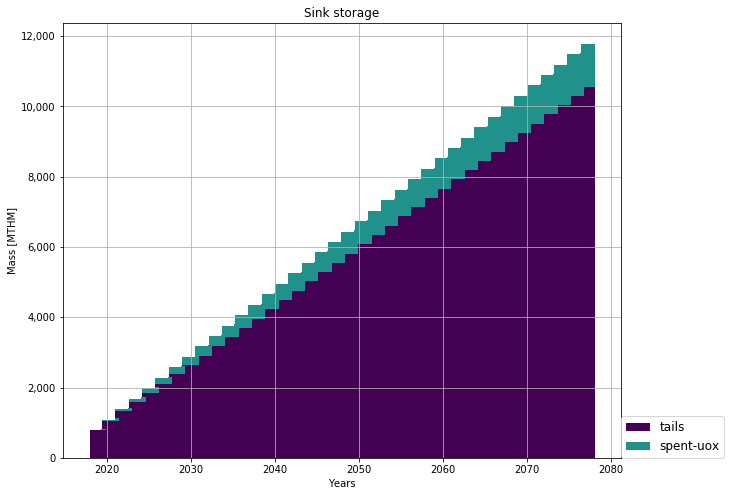

In [9]:
facility = 'NuclearRepository' # facility of interest
title  = 'Cumulative Isotope Inventory of Repository'  # title of plot

analysis.plot_commodities(cur,archetype='sink',facility_commodity=['tails','spent-uox'],title = 'Sink storage',
                          filename='sink',is_cum=True,is_outflux=False)
from IPython.display import Image
Image(filename='sink.png')

Now let's plot the cumulative mass of the spent nuclear fuel that is mined from the Uranium mine.
To plot the outflux of a facility, use the analysis.plot_out_flux_cumulative(cur,sender,plot title) function.

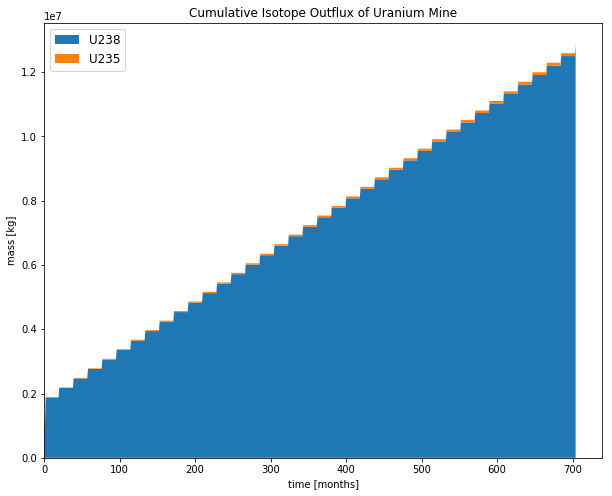

In [7]:
analysis.plot_out_flux_cumulative(cur, 'UraniumMine','Cumulative Isotope Outflux of Uranium Mine')


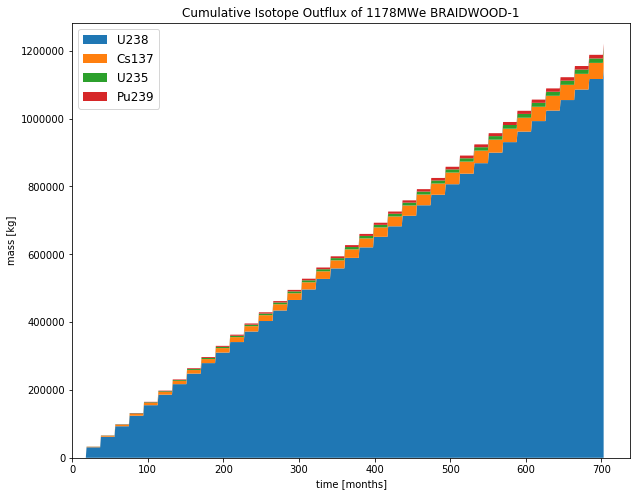

In [8]:
analysis.plot_out_flux_cumulative(cur, '1178MWe BRAIDWOOD-1','Cumulative Isotope Outflux of 1178MWe BRAIDWOOD-1')

Now let's plot the mass series and cumulative mass of the fresh nuclear fuel that is received by the 1178MWe BRAIDWOOD-1.

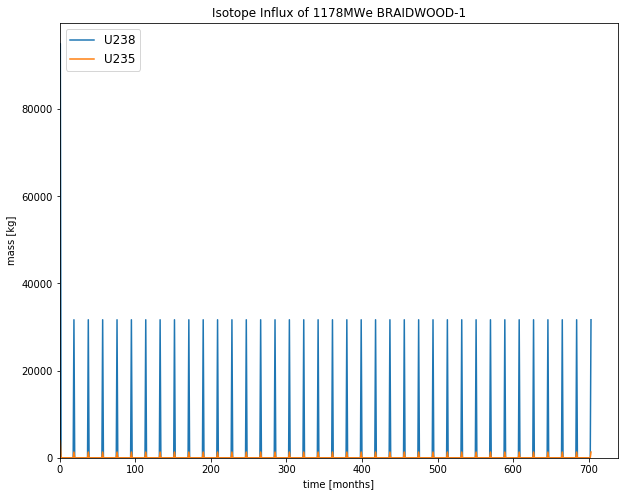

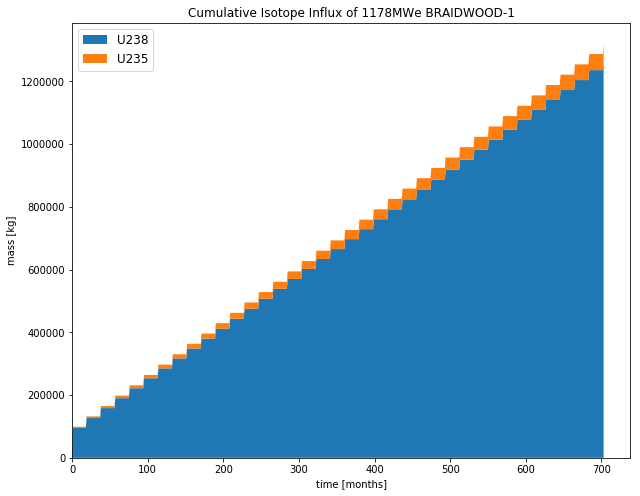

In [14]:
analysis.plot_in_flux(cur, '1178MWe BRAIDWOOD-1','Isotope Influx of 1178MWe BRAIDWOOD-1')
analysis.plot_in_flux_cumulative(cur, '1178MWe BRAIDWOOD-1','Cumulative Isotope Influx of 1178MWe BRAIDWOOD-1')

We can also find the total amount [kg] of an isotope that was used/sent from a facility using the `total_isotope_used` function.
For example, if we wanted to find out how much $^{235}$U and $^{238}$U was mined from the Uranium Mine, we can call:

In [16]:
uranium_mined = analysis.total_isotope_used(cur, 'UraniumMine')
print("Total amount of U-235 mined:" + ' '  + str(uranium_mined['U235']) + ' ' + 'kg')
print("Total amount of U-238 mined:" + ' '  + str(uranium_mined['U238']) + ' ' + 'kg')


Total amount of U-235 mined: 91599.6350365 kg
Total amount of U-238 mined: 12791612.0438 kg


Let's say we wanted to see the composition of the spent nuclear fuel from the reactor. We could call `total_isotope_used` with `facility` = `'1178MWe BRAIDWOOD-1'` to find out!

<div class="alert alert-info">
**Interactive Input**
<br/>
Using the table below, create the following variable.  Include appropriate comments.
</div>

| Variable | Value  | Purpose |
| -------- | ------ | ------- |
| `facility`      | `'1178MWe BRAIDWOOD-1'` | facility of interest |


Text(0.5,1,'SNF mass composition')

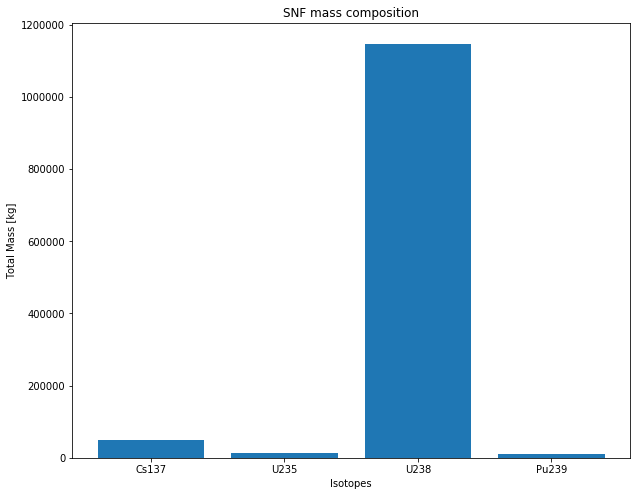

In [31]:
facility = '1178MWe BRAIDWOOD-1' # facility of interest
snf_comp = analysis.total_isotope_used(cur, facility)
snf_comp
isotopes = [item[0] for item in snf_comp.items()]
masses = [item[1] for item in snf_comp.items()]
plt.bar(isotopes,masses)
plt.xlabel('Isotopes')
plt.ylabel('Total Mass [kg]')
plt.title('SNF mass composition')

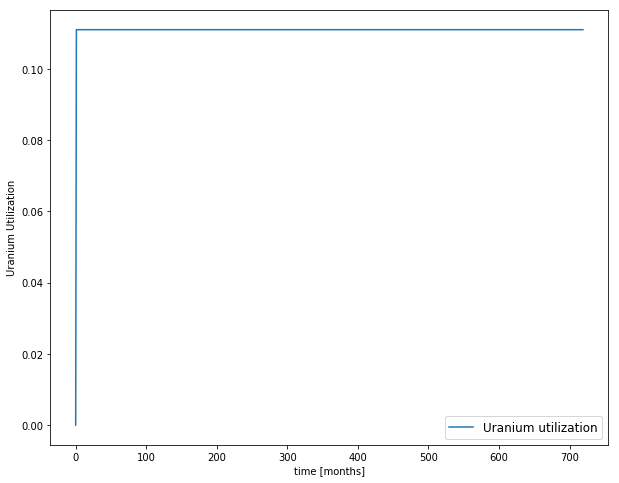

In [17]:
analysis.plot_uranium_utilization(cur)

## Simulation Time Info

In [18]:
init_year, init_month, duration, timestep = analysis.simulation_timesteps(cur)
print('Start year:' + str(init_year))
print('Start month:' + str(init_month))
print('Duration of simulation months:' + str(duration))
print('List of timesteps:' + str(timestep[0:3]) +' . . . '  +str(timestep[-4:-1]))


Start year:2018
Start month:1
Duration of simulation months:720
List of timesteps:[ 0.  1.  2.] . . . [ 716.  717.  718.]


Maximum amount of fresh-uox moved: 99000.0
Amount of fresh-uox moved at first timestep: 99000.0


Text(0.5,1,'Fresh-uox transaction timeseries')

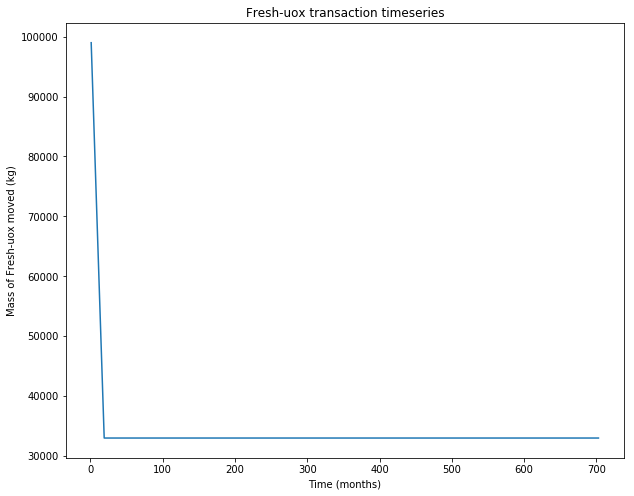

In [19]:
# prints maximum required sfr fuel throughput per timestep
fuel = cur.execute('SELECT time, sum(quantity) FROM transactions '
                       'INNER JOIN resources ON resources.resourceid = '
                       'transactions.resourceid WHERE commodity = "fresh-uox"'
                       ' GROUP BY time').fetchall()

fresh_uox = np.array(fuel)
fuel_transaction = [fuel[1] for fuel in fresh_uox]
fuel_timestep = [fuel[0] for fuel in fresh_uox]

maximum_fuel_moved = np.amax(np.array(fuel))
print('Maximum amount of fresh-uox moved: ' + str(maximum_fuel_moved))

first_fuel_transaction = np.array(fuel)[0][1]
print('Amount of fresh-uox moved at first timestep: ' +  str(first_fuel_transaction))
#print(max(analysis.simulation_timesteps(fuel, duration, True)))

plt.plot(fuel_timestep,fuel_transaction)
plt.xlabel('Time (months)')
plt.ylabel('Mass of Fresh-uox moved (kg)')
plt.title('Fresh-uox transaction timeseries')

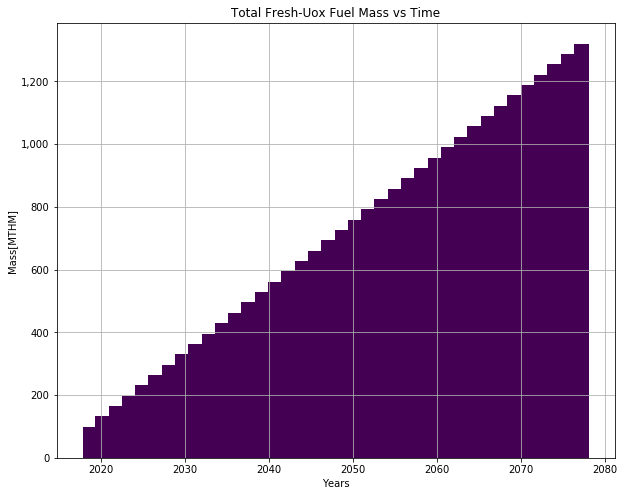

In [20]:
fuel_dict = analysis.fuel_usage_timeseries(cur, ['fresh-uox'])
fuel_dict
analysis.stacked_bar_chart(fuel_dict, timestep,
                  'Years', 'Mass[MTHM]',
                  'Total Fresh-Uox Fuel Mass vs Time',
                  'total_fuel',
                  init_year)
from IPython.display import Image
Image(filename='total_fuel.png')

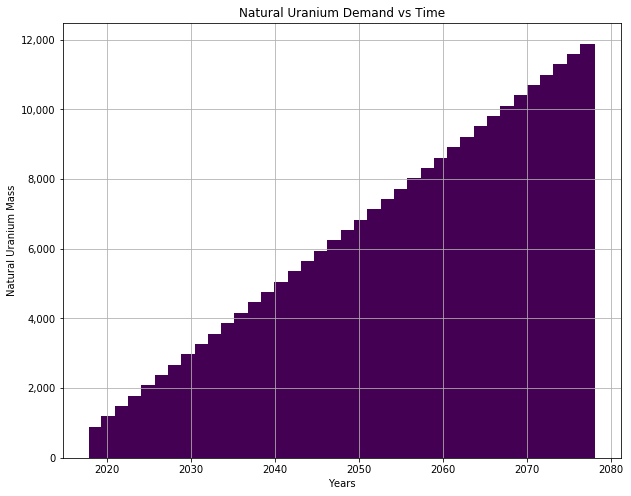

In [21]:
# natural uranium demand
import collections
nat_u = collections.OrderedDict()
nat_u['nat_u'] = analysis.nat_u_timeseries(cur)
analysis.stacked_bar_chart(nat_u, timestep,
                     'Years', 'Natural Uranium Mass',
                     'Natural Uranium Demand vs Time',
                     'nat_u', init_year)
from IPython.display import Image
Image(filename='nat_u.png')

## Ask: Why is the orange line steeper in slope than the green line?
<img src="img/nat_u_img.png" width="650"><br>


Maximum amount of tails moved during one time step: 99000.0


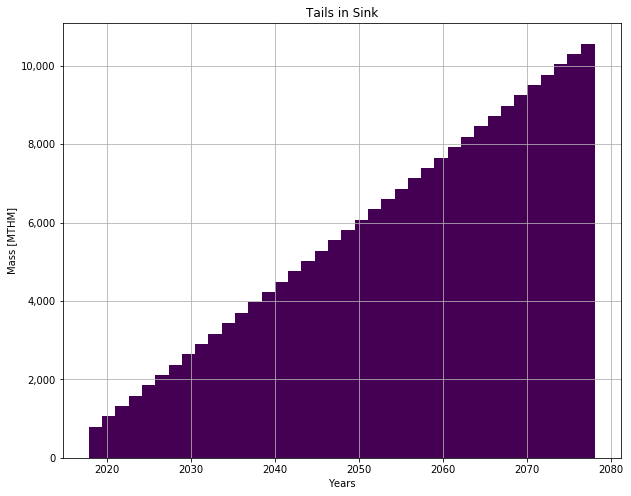

In [23]:
tails = cur.execute('SELECT time, sum(quantity) FROM transactions '
                       'INNER JOIN resources ON resources.resourceid = '
                       'transactions.resourceid WHERE commodity = "tails"'
                       ' GROUP BY time').fetchall()

tails_array = np.array(fuel)
tails_transaction = [tail[1] for tail in tails_array]
tails_timeseries = [fuel[0] for fuel in tails_array]

maximum_fuel_moved = np.amax(tails_array)
print('Maximum amount of tails moved during one time step: ' + str(maximum_fuel_moved))

analysis.plot_commodities(cur,archetype='sink',facility_commodity=['tails'],title='Tails in Sink',filename='tails',is_cum=True,is_outflux=False)
from IPython.display import Image
Image(filename='tails.png')

## Decay heat
Using our `spent` fuel composition from above, lets see which isotope causes the most decay heat!

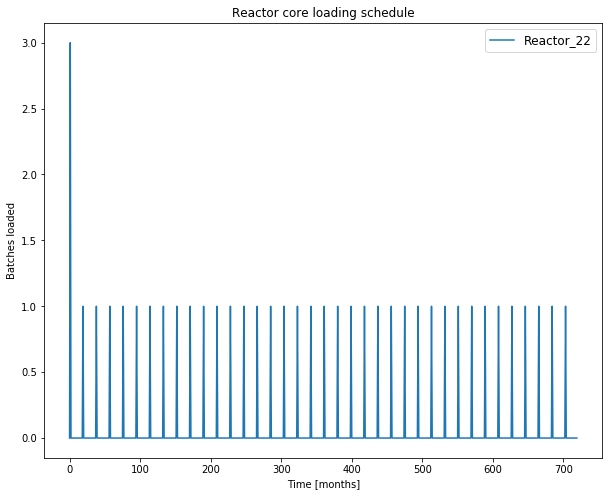

In [40]:
analysis.plot_reactor_events(cur,reactors = [])


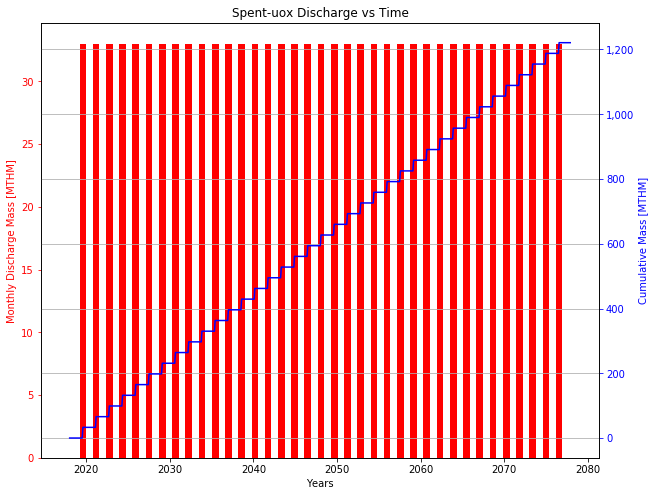

In [41]:
analysis.plot_commodity(cur,archetype='Sink',facility_commodity=['spent-uox'],is_outflux=False,is_cum=True)
from IPython.display import Image
Image(filename='cum_mass_spent-uoxdischarge.png')

## Adding a Reactor

We will now add a second reactor, `1000We Lightwater-1`, to our simulation. This reactor will have a lifetime of 360 months (30 years), cycle time of 15 months, assembly size of 30160, and power capacity 1000 MWe. 
Using this information, let's construct the facility input section of this reactor.

**Interactive Input**
<br/>
Using the table below, fill out the reactor facility template with the following variables.  Include appropriate comments.
</div>

| Variable | Value  |
| -------- | ------ | 
| `name`      | `1000We Lightwater-1` | 
| `lifetime`  | `360` | 
| `Archetype`      | `Reactor` |
| `fuel_incommods`     | `fresh-uox` | 
| `fuel_inrecipes`   | `fresh-uox`  |
| `fuel_outcommods`   | `spent-uox`  | 
| `fuel_outrecipes`     | `spent-uox` |
| `cycle_time`   | `15`  |
| `refuel_time`   | `1`  |
| `assem_size`     | `33000` |
| `n_assem_core`   | `3`  |
| `n_assem_batch`   | `1`  |
| `power_cap`   | `1000`  |



### Second reactor facility template
```
      <facility>
        <name>1000We Lightwater-1</name>
        <lifetime>360</lifetime>
        <config>
          <Reactor>
            <fuel_incommods> <val>fresh-uox</val> </fuel_incommods>
            <fuel_inrecipes> <val>fresh-uox</val> </fuel_inrecipes>
            <fuel_outcommods> <val>spent-uox</val> </fuel_outcommods>
            <fuel_outrecipes> <val>spent-uox</val> </fuel_outrecipes>
            <cycle_time>15</cycle_time>
            <refuel_time>1</refuel_time>
            <assem_size>33000</assem_size>
            <n_assem_core>3</n_assem_core>
            <n_assem_batch>1</n_assem_batch>
            <power_cap>1000</power_cap>
          </Reactor>
        </config>
      </facility>
```

### Second reactor Institution
We must add this second reactor into the region and facility section of our CYCLUS input file. To do so, go to the `entry` header under the `initialfacilitylist` section of the region block of the input file and add 
```
            <entry>
              <prototype>1000We Lightwater-1</prototype>
              <number>1</number>
            </entry>
```
The Reactor's section of the region block should now look like,

```
<region>
        <name>USA</name>
        <config>
          <NullRegion/>
        </config>
        <institution>
          <initialfacilitylist>
            <entry>
              <prototype>1178MWe BRAIDWOOD-1</prototype>
              <number>1</number>
            </entry>
            <entry>
              <prototype>1000We Lightwater-1</prototype>
              <number>1</number>
            </entry>
          </initialfacilitylist>
          <name>Exelon Reactors</name>
          <config>
            <NullInst/>
          </config>
        </institution>
```

### Now let's run this scenario!

In [4]:
# CYCLUS will not overwrite an old file - delete the old version if you run a simulation again and put
# the output to the same filename
!rm cyclus.sqlite
!cyclus template/cyclus_two_reactor.xml -o cyclus.sqlite
# this is a command that can be executed in your terminal, without the ! . The -o flag is used to
# set the name of the output file.  Without it, the default is "cyclus.sqlite"

              :                                                               
          .CL:CC CC             _Q     _Q  _Q_Q    _Q    _Q              _Q   
        CC;CCCCCCCC:C;         /_\)   /_\)/_/\\)  /_\)  /_\)            /_\)  
        CCCCCCCCCCCCCl       __O|/O___O|/O_OO|/O__O|/O__O|/O____________O|/O__
     CCCCCCf     iCCCLCC     /////////////////////////////////////////////////
     iCCCt  ;;;;;.  CCCC                                                      
    CCCC  ;;;;;;;;;. CClL.                          c                         
   CCCC ,;;       ;;: CCCC  ;                   : CCCCi                       
    CCC ;;         ;;  CC   ;;:                CCC`   `C;                     
  lCCC ;;              CCCC  ;;;:             :CC .;;. C;   ;    :   ;  :;;   
  CCCC ;.              CCCC    ;;;,           CC ;    ; Ci  ;    :   ;  :  ;  
   iCC :;               CC       ;;;,        ;C ;       CC  ;    :   ; .      
  CCCi ;;               CCC        ;;;.      .C ;   


Status: Cyclus run successful!
Output location: cyclus.sqlite
Simulation ID: 21055bb9-0adc-49ad-bbbd-58024a2d263c


In [5]:
cur = analysis.cursor('cyclus.sqlite')

NameError: name 'analysis' is not defined

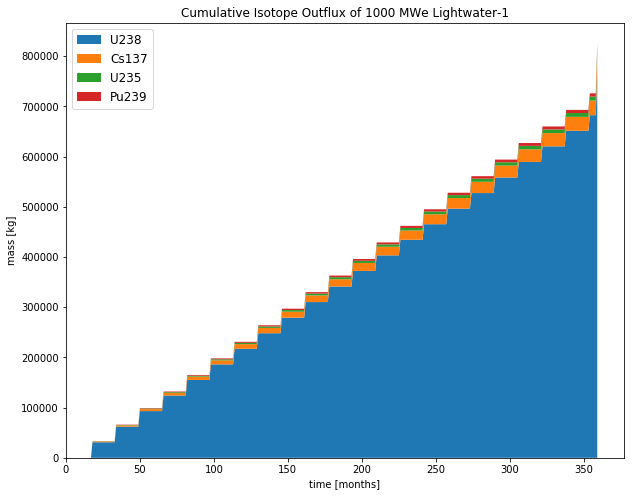

In [35]:
plt.rcParams['figure.figsize'] = [10, 8]
plt.rcParams['legend.fontsize'] = 12
facility = '1000MWe Lightwater-1'
title = 'Cumulative Isotope Outflux of 1000 MWe Lightwater-1'
analysis.plot_out_flux_cumulative(cur, facility,title)

## Ask:
* Why does 'Cumulative Isotope Outflux of 'Lightwater-1' plot only go for 360 months ?
* Why is there a spike in isotope outflux at the end of the lifetime of the  'Lightwater-1' ?

## Share: 
* What are some other reactor differences between this plot and the 'Cumulative Isotope Outflux of '1178MWe BRAIDWOOD-1' reactor. 

Let's take a look at the total mass of spent nuclear fuel stored at the Nuclear Waste Repository.
To plot, use the `analysis.plot_in_flux_cumulative(cur, facility, title)` function. 
<div class="alert alert-info">
**Interactive Input**
<br/>
Using the table below, create the following variables.  Include appropriate comments.
</div>

| Variable | Value  | Purpose |
| -------- | ------ | ------- |
| `facility`      | `'NuclearRepository'` | facility of interest |
| `title`     | `'Cumulative Isotope Inventory of Repository'` | title of plot |


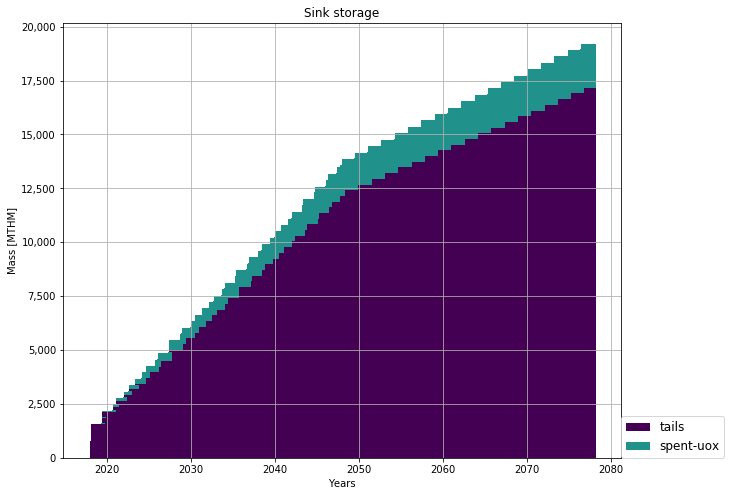

In [34]:
facility = 'NuclearRepository' # facility of interest
title  = 'Cumulative Isotope Inventory of Repository'  # title of plot

analysis.plot_commodities(cur,archetype='sink',facility_commodity=['tails','spent-uox'],title = 'Sink storage',
                          filename='sink_two',is_cum=True,is_outflux=False)
from IPython.display import Image
Image(filename='sink_two.png')

As seen in the above plot, the rate at which `tails` and `spent-uox` is stored at the `Sink` decreases considably around the year 2050 as the `Lightwater-1` reactor shuts down in the year 2048.